In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/Hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
results = session.query(measurement.station, measurement.date, measurement.prcp).all()
results

[('USC00519397', '2010-01-01', 0.08),
 ('USC00519397', '2010-01-02', 0.0),
 ('USC00519397', '2010-01-03', 0.0),
 ('USC00519397', '2010-01-04', 0.0),
 ('USC00519397', '2010-01-06', None),
 ('USC00519397', '2010-01-07', 0.06),
 ('USC00519397', '2010-01-08', 0.0),
 ('USC00519397', '2010-01-09', 0.0),
 ('USC00519397', '2010-01-10', 0.0),
 ('USC00519397', '2010-01-11', 0.01),
 ('USC00519397', '2010-01-12', 0.0),
 ('USC00519397', '2010-01-14', 0.0),
 ('USC00519397', '2010-01-15', 0.0),
 ('USC00519397', '2010-01-16', 0.0),
 ('USC00519397', '2010-01-17', 0.0),
 ('USC00519397', '2010-01-18', 0.0),
 ('USC00519397', '2010-01-19', 0.0),
 ('USC00519397', '2010-01-20', 0.0),
 ('USC00519397', '2010-01-21', 0.0),
 ('USC00519397', '2010-01-22', 0.0),
 ('USC00519397', '2010-01-23', 0.0),
 ('USC00519397', '2010-01-24', 0.01),
 ('USC00519397', '2010-01-25', 0.0),
 ('USC00519397', '2010-01-26', 0.04),
 ('USC00519397', '2010-01-27', 0.12),
 ('USC00519397', '2010-01-28', 0.0),
 ('USC00519397', '2010-01-30', 

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23')

In [47]:
# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017,8,23)-dt.timedelta(days=365)
one_year_prior

datetime.date(2016, 8, 23)

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# precip=prcp in csv file
prcp_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_prior).order_by\
(measurement.date).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [49]:
# Perform a query to retrieve the date and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
prcp_scores


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_data_df = pd.DataFrame(prcp_data, columns = ["Date", "Precipitation"])
prcp_data_df.set_index("Date", inplace = True)
prcp_data_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


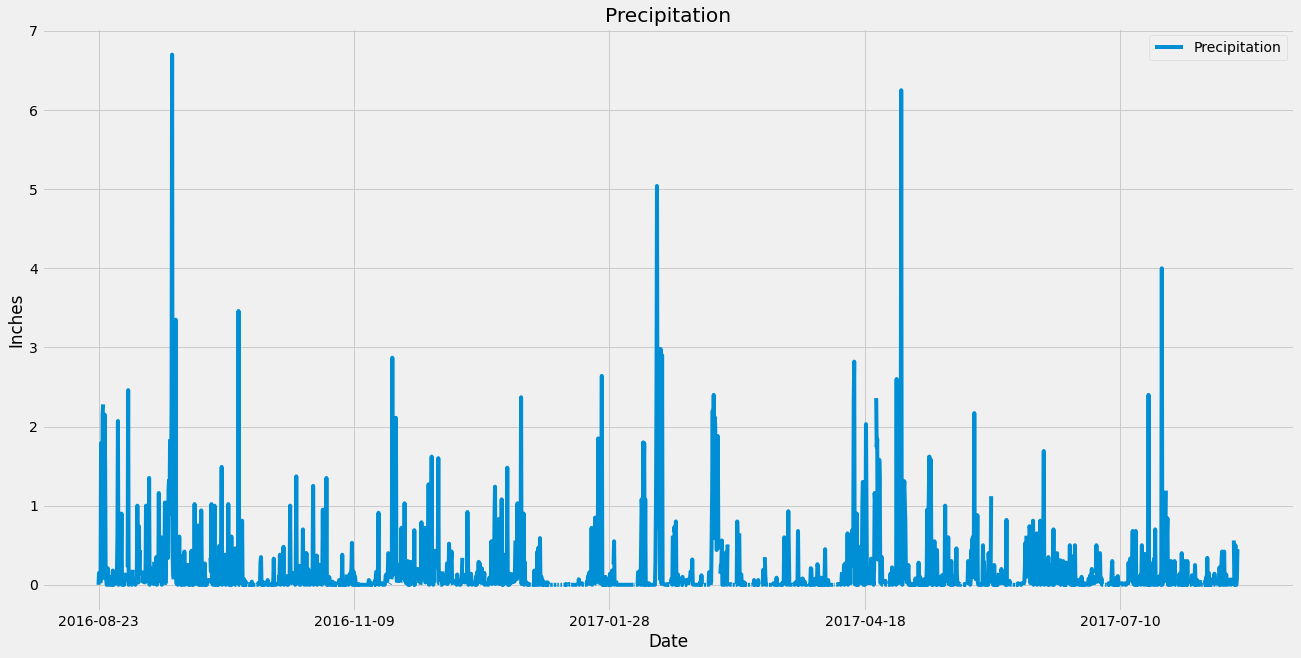

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(title = "Precipitation" ,figsize = (20,10))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc = 'upper right')
plt.savefig("../My_Images/precipitation")
plt.show()

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(measurement.station).distinct().count()
total_stations
print(f'There are {total_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station))\
                      .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
most_active_station = session.query(measurement.station, func.count(measurement.station))\
                      .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()[0]
most_active_station
print(f'The most active station is {most_active_station}.')

The most active station is ('USC00519281', 2772).


In [56]:
# Using the most active station id from the previous query, calculate the lowest temperature.
sel = [func.min(measurement.tobs)]

min_temp = session.query(*sel).filter(measurement.station == "USC00519281").all()
min_temp

[(54.0)]

In [57]:
# Using the most active station id from the previous query, calculate the highest temperature. 
sel = [func.max(measurement.tobs)]

max_temp = session.query(*sel).filter(measurement.station == "USC00519281").all()
max_temp

[(85.0)]

In [58]:
# Using the most active station id from the previous query, calculate the average temperature. 
sel = [func.avg(measurement.tobs)]

avg_temp = session.query(*sel).filter(measurement.station == "USC00519281").all()
avg_temp

[(71.66378066378067)]

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.
temp_obs_data = session.query(measurement.tobs).filter(measurement.date >= one_year_prior)\
.filter(measurement.station == "USC00519281").order_by(measurement.date).all()
temp_obs_data

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [60]:
temp_obs_data_df = pd.DataFrame(temp_obs_data, columns = ["Temperature Observation"])
temp_obs_data_df

,Temperature Observation
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<function matplotlib.pyplot.show(close=None, block=None)>

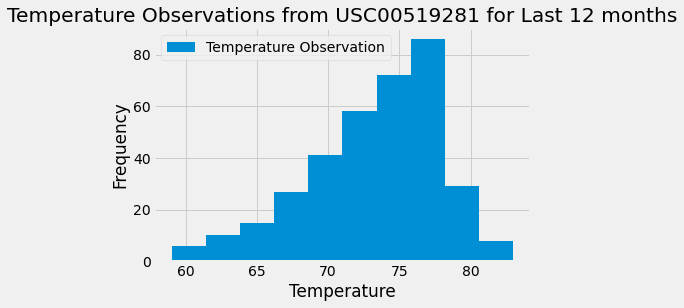

In [62]:
# Plot the results as a histogram
temp_obs_data_df.plot.hist(title = "Temperature Observations from USC00519281 for Last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend
plt.savefig("../My_Images/temperature_obs.png")
plt.show

# Close session

In [ ]:
# Close Session
session.close()